<h1 align="center">
<img src="https://www.interest.co.nz/sites/default/files/2024-08/bank-icon.jpg" width="400">
<br>Study Case: The Bank Marketing Dataset
<h4 align="center">Technical Risks in Machine Learning Models</h2>
</h1>


The [Bank Marketing dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) is a popular dataset often used in classification tasks, especially in predictive modeling to determine if a client will subscribe to a term deposit after a marketing campaign. The dataset contains information collected from direct phone marketing campaigns conducted by a Portuguese banking institution. Each row represents one contact with a potential client, with several features related to the client’s profile, the contact campaign, and the economic context.

**(Goal)** The primary goal when working with the Bank Marketing dataset is to predict whether a client will subscribe to a term deposit, based on the input features from the dataset. The target variable is binary, indicating _yes_ if the client subscribed and _no_ if they did not.

**(Features)** The following table presents the 16 features of Compas dataset, inclusing the target variable "y (target)".

| Feature                  | Description                                                                                      |
|--------------------------|--------------------------------------------------------------------------------------------------|
| `age` | age of individual |
| `job` |  type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") |
| `marital` | marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) |
| `education` | (categorical: "unknown","secondary","primary","tertiary") |
| `default` | has credit in default? (binary: "yes","no") |
| `balance` | average yearly balance, in euros (numeric) |
| `housing` | has housing loan? (binary: "yes","no") |
| `loan` | has personal loan? (binary: "yes","no") |
| `contact` | contact communication type (categorical: "unknown","telephone","cellular") |
| `day` | last contact day of the month (numeric) |
| `month` | last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") |
| `duration` | last contact duration, in seconds (numeric) |
| `campaign` | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| `pdays` | number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) |
| `previous` | number of contacts performed before this campaign and for this client (numeric) |
| `poutcome` | outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") |
| `y (target)` | has the client subscribed a term deposit? (binary: "yes","no") |

### Load Dataset

In [1]:
from holisticai.datasets import load_dataset

dataset = load_dataset("bank_marketing", protected_attribute="marital")
split_dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = split_dataset['train']
test = split_dataset['test']

## 1. Train a Binary Classification Model

In [2]:
from sklearn.ensemble import RandomForestClassifier
from holisticai.utils import BinaryClassificationProxy

model = RandomForestClassifier(random_state=42)

model.fit(train['X'], train['y'])

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba)

## 2. Measuring Efficacy

Efficacy metrics are used to evaluate the performance of a model by quantifying how accurately it makes predictions.

## a) Accuracy

**Accuracy** is a metric that measures the proportion of correct predictions made by a classification model out of the total predictions. It is a commonly used metric for model evaluation, especially when the classes are balanced.

### Formula

Accuracy is defined as:

$$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
$$

where:
- **True Positives (TP)**: Correct positive predictions.
- **True Negatives (TN)**: Correct negative predictions.
- **Total Predictions** $= \text{True Positives} + \text{True Negatives} + \text{False Positives} + \text{False Negatives}$.

### Interpretation

- **Accuracy = 1**: The model predicts all outcomes correctly.
- **Accuracy < 1**: The model has some incorrect predictions.

Accuracy is useful when the class distribution is balanced. However, it can be misleading if the data is imbalanced, as it does no


In [3]:
from sklearn.metrics import accuracy_score

y_test_pred = proxy.predict(test['X'])
accuracy_score(test['y'], y_test_pred)

0.9027977441114674

## b) F1 Score

The **F1 Score** is a metric that combines both precision and recall into a single score. It is especially useful for evaluating the performance of a classification model when there is an imbalance in the class distribution, as it balances the trade-off between false positives and false negatives.

### Formula

The F1 Score is the harmonic mean of precision and recall and is defined as:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

where:
- **Precision**: The ratio of correctly predicted positive observations to total predicted positives.

  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$

- **Recall**: The ratio of correctly predicted positive observations to all actual positives.

  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$

### Interpretation

- **F1 Score = 1**: Perfect precision and recall.
- **F1 Score = 0**: Model fails to identify any true positives.
  
A higher F1 Score indicates better

In [4]:
from sklearn.metrics import f1_score

f1_score(test['y'], y_test_pred)

np.float64(0.48746355685131193)

What other efficacy metrics do we have for binary classification? Holistic AI library allows you to perform a practical inspection of the metrics by calling ```classification_efficacy_metrics```:

In [5]:
from holisticai.efficacy.metrics import classification_efficacy_metrics

classification_efficacy_metrics(test['y'], y_test_pred)

,Value,Reference
Metric,,
Accuracy,0.902798,1
Balanced Accuracy,0.681092,1
Precision,0.648062,1
Recall,0.390654,1
F1-Score,0.487464,1


# 2. Measuring Bias

In machine learning fairness, Equal Opportunity and Equal Outcomes are distinct concepts:

- **Equal Opportunity**: Ensures individuals with similar qualifications have equal chances of positive outcomes, focusing on equal true positive rates across groups.

- **Equal Outcomes**: Aims for equal proportions of positive results among different demographic groups, regardless of individual qualifications.

## a) Disparate Impact

**Disparate Impact** is a fairness metric used to measure the relative rate of favorable outcomes between an unprivileged group and a privileged group. It is commonly used to assess whether a model’s predictions disproportionately favor one group over another. A value close to 1 indicates fairness, while values significantly above or below 1 indicate potential bias.

### Formula

$$
\text{Disparate Impact} = \frac{P(\text{positive outcome | unprivileged})}{P(\text{positive outcome | privileged})}
$$

where:
- $P(\text{positive outcome | unprivileged})$ is the probability of a positive outcome for the unprivileged group.
- $P(\text{positive outcome | privileged})$ is the probability of a positive outcome for the privileged group.


### Interpretation

- **Disparate Impact ≈ 1**: The model is fair (similar outcomes for both groups).
- **< 1**: The privileged group has a higher rate of positive outcomes.
- **> 1**: The unprivileged group has a higher rate of positive outcomes.

In practice, a common threshold for fairness is that **Disparate Impact should be between 0.8 and 1.25**. If the metric falls outside this range, the model may be considered biased.

In [6]:
from holisticai.bias.metrics import disparate_impact

disparate_impact(test['group_a'], test['group_b'], y_test_pred)

np.float64(0.7215800950677621)

## b) Equal Opportunity Difference

The **Equal Opportunity Difference** is a fairness metric that measures the difference in true positive rates (TPR) between privileged and unprivileged groups in a classification model. Ideally, this difference should be close to zero to ensure fairness.

### Formula

$$
\text{Equal Opportunity Difference} = TPR_{privileged} - TPR_{unprivileged}
$$

### Interpretation

- **0**: The model is fair (Equal Opportunity).
- **Positive**: The privileged group has a higher chance of a positive prediction.
- **Negative**: The unprivileged group has a higher chance of a positive prediction.

In [7]:
from holisticai.bias.metrics import equal_opportunity_diff

equal_opportunity_diff(test['group_a'], test['group_b'], y_test_pred, test['y'])

np.float64(-0.0033457718422086336)

You can access all bias metrics for binary classification available in the HolisticAI library using the ```classification_bias_metrics``` function.

In [8]:
from holisticai.bias.metrics import classification_bias_metrics

classification_bias_metrics(test['group_a'], test['group_b'], y_test_pred, test['y'])

,Value,Reference
Metric,,
Statistical Parity,-0.023910,0
Disparate Impact,0.721580,1
Four Fifths Rule,0.721580,1
Cohen D,-0.092996,0
2SD Rule,-4.311818,0
Equality of Opportunity Difference,-0.003346,0
False Positive Rate Difference,-0.010904,0
Average Odds Difference,-0.007125,0
Accuracy Difference,0.031521,0


# Measuring Explainability

Model interpretability can be quantified through various criteria that assess how understandable a model is, as well as through transparent surrogate models that aim to represent the actual model and its decision-making process. Some criteria include:

- **Concentration of Feature Importance**: Evaluating how feature importance is distributed across the model.

- **Consistency of Feature Importance Ranking**: Assessing the stability of feature importance rankings across different decision groups within the model, such as classes 0 and 1 in binary classification.

- **Stability of Feature Importance Across the Dataset**: Analyzing how feature importance varies throughout the dataset.

- **Complexity of Feature Relationships**: Examining the complexity of the relationship between features and their partial dependence plots.

Another approach to quantifying interpretability is to evaluate how effectively a transparent model fits the actual model. For instance, if the surrogate model is a decision tree, additional measures such as tree depth or the number of features used by the transparent model can be considered.

In this tutorial, we will calculate certain model features that will assist in evaluating interpretability metrics.

In [9]:
from holisticai.inspection import compute_permutation_importance
from holisticai.utils.surrogate_models import create_surrogate_model
from holisticai.inspection import compute_partial_dependence
from holisticai.inspection import compute_conditional_permutation_importance


# Feature Importance
importance = compute_permutation_importance(proxy, X=train['X'], y=train['y'])
top_importance = importance.top_alpha()
top_feature_names = top_importance.feature_names

# Conditional Feature Importance
conditional_impotance = compute_conditional_permutation_importance(proxy, X=test['X'], y=test['y'])

# Partial Dependence
X_sample = test['X'].sample(1000)
partial_dependence = compute_partial_dependence(features=top_feature_names, proxy=proxy, X=X_sample)

# Surrogate Model
surrogate_model = create_surrogate_model(X=train['X'], y_pred=train['y'], surrogate_type='tree', learning_task='classification')

Measuring Alpha  Score that represents the percentage of features that represent the 80% of importnaces in the model behaivours. A lower value points that we can explain the model decision with few features.

In [10]:
from holisticai.explainability.metrics.global_feature_importance import alpha_score

alpha_score(importance)

0.3617021276595745

Measuring Fluctuation Ratio points the percentage in the PDP curve that present fluctuation in the model prediction.

In [11]:
from holisticai.explainability.metrics.global_feature_importance import fluctuation_ratio

fluctuation_ratio(partial_dependence)

0.03770588235294118

Rank Alignment estimates the percentage of features that remain aligned at the top of importances for label 0 and label 1

In [12]:
from holisticai.explainability.metrics.global_feature_importance import rank_alignment

rank_alignment(conditional_impotance, top_importance)

0.43529411764705883

Global Feature Importance Based Metrics

In [13]:
from holisticai.explainability.metrics import classification_global_feature_importance_explainability_metrics

classification_global_feature_importance_explainability_metrics(partial_dependence, importance, conditional_impotance)

,Value,Reference
Spread Divergence,0.4993,1
Fluctuation Ratio,0.037706,0
Rank Alignment,0.5,1
Alpha Score,0.361702,0


Tree based Metrics

In [14]:
from holisticai.explainability.metrics import tree_explainability_metrics

tree_explainability_metrics(surrogate_model)

,value,reference
metric,,
Weighted Average Depth,16.880031,0.0
Weighted Average Explainability Score,15.315870,0.0
Weighted Gini Index,0.883259,0.0
Tree Depth Variance,30.687820,0.0
Number of Rules,3861.000000,1.0
Number of Features,47.000000,1.0


Surrogate Based Metrics

In [15]:
from holisticai.explainability.metrics import classification_surrogate_explainability_metrics

y_pred = proxy.predict(test['X'])
classification_surrogate_explainability_metrics(test['X'], test['y'], y_pred, surrogate_model)

,Value,Reference
Accuracy Degradation,0.040235,0
Surrogate Fidelity,0.909101,1
Surrogate Feature Stability,0.955319,1


# Measuring Security

Security metrics in machine learning evaluate the robustness and resilience of models against threats to data privacy, model integrity, and information leakage. They provide insight into how susceptible a model is to various risks and guide strategies to safeguard sensitive information and maintain reliable performance.

Here’s a brief description of each type of security metric in the library:

- **SHAPR**: This metric assesses membership privacy risk by estimating how much individual training data points influence model predictions. By using Shapley values, SHAPR quantifies the likelihood of data memorization, which can reveal vulnerabilities to membership inference attacks.

- **Data Minimizer**: Similar to feature selection methods, Data Minimizer evaluates the model’s performance as features are iteratively removed. By identifying features that have minimal impact on model accuracy, it highlights areas where data minimization can improve privacy without sacrificing effectiveness.

- **Privacy Risk Score**: This metric quantifies the likelihood that a specific input sample originates from the model's training set, based on the model's responses to that sample. Privacy Risk Score helps to identify which samples present the highest risk to be classified as training data, or in general, how risky is the model in terms of data privacy with respect to our training data.

In [16]:
from holisticai.security.metrics import shapr_score

y_pred_train = proxy.predict(train['X'])
y_pred_test = proxy.predict(test['X'])

shapr_score(train['y'], test['y'], y_pred_train, y_pred_test, train_size=0.4)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


array([[0.00011058, 0.00011058, 0.00011058, ..., 0.00011058, 0.00011058,
        0.00011058],
       [0.00011058, 0.00011058, 0.00011058, ..., 0.00011058, 0.00011058,
        0.00011058],
       [0.00011058, 0.00011058, 0.00011058, ..., 0.00011058, 0.00011058,
        0.00011058],
       ...,
       [0.00011058, 0.00011058, 0.00011058, ..., 0.00011058, 0.00011058,
        0.00011058],
       [0.00011058, 0.00011058, 0.00011058, ..., 0.00011058, 0.00011058,
        0.00011058],
       [0.00011058, 0.00011058, 0.00011058, ..., 0.00011058, 0.00011058,
        0.00011058]], dtype=float32)

In [17]:
from holisticai.security.commons import DataMinimizer
from holisticai.security.metrics import data_minimization_score

dmin = DataMinimizer(proxy=proxy, selector_types=["Percentile", "Variance"])
dmin.fit(train['X'], train['y'])

y_pred_test = proxy.predict(test['X'])
y_pred_test_dm = dmin.predict(test['X'])


data_minimization_score(test['y'], y_pred_test, y_pred_test_dm)

0.9985322896281801

In [ ]:
from holisticai.security.metrics import privacy_risk_score

target_shadow = train.train_test_split(test_size=0.4, random_state=42)

X_shadow_train = target_shadow['test']['X']
y_shadow_train = target_shadow['test']['y']

shadow_model = RandomForestClassifier(random_state=42)
shadow_model.fit(X_shadow_train, y_shadow_train)

shadow_train_probs = shadow_model.predict_proba(X_shadow_train)
shadow_test_probs = shadow_model.predict_proba(test['X'])
target_train_probs = proxy.predict_proba(train['X'])
target_test_probs = proxy.predict_proba(test['X'])

risk_score_train = privacy_risk_score((shadow_train_probs, y_shadow_train), (shadow_test_probs, test['y']), (target_train_probs, train['y']))
print("Mean Privacy Risk Score for train: ", risk_score_train.mean())

Mean Privacy Risk Score for train:  0.5577107866201819


Given that this metric estimates an individual sample’s probability of being in the target model’s training set. By calculating the mean Privacy Risk Score across all samples, we can obtain a global measure of the model’s privacy risk. In an ideal scenario, the Privacy Risk Score should be close to 0, indicating a low risk of data memorization, while higher values suggest potential vulnerabilities to membership inference attacks.

# Measuring Robustness

Robustness metrics are measures used to evaluate how well machine learning models maintain performance under varying conditions, such as data shifts, adversarial inputs, or environmental changes. These metrics help assess a model’s resilience and reliability in real-world applications.


Accuracy Degradation Factor (ADF) is a robustness metric that detects the first point of significant accuracy drop as a dataset is gradually reduced, allowing for the prediction of performance shifts due to changing data distributions. Here is an exampel how to use the metric:

In [19]:
from holisticai.robustness.metrics import (
    accuracy_degradation_profile,
    accuracy_degradation_factor,
)
import pandas as pd

results = accuracy_degradation_profile(test['X'], 
                                    test['y'], 
                                    y_test_pred, 
                                    n_neighbors = 50,
                                    step_size = 0.02,
                                    )
accuracy_degradation_factor(pd.DataFrame(results.data))

/home/kcosta/repos/hai/holisticai/src/holisticai/robustness/metrics/dataset_shift/_accuracy_degradation_profile.py:526: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_summary_df = pd.concat([results_summary_df, new_row], ignore_index=True)


0.06

## Extra Example: Bias-Accuracy Tradeoff

In [24]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from holisticai.bias.metrics import equal_opportunity_diff, statistical_parity, disparate_impact

In [28]:
models = {
    'LR_l2': LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42),
    'LR_l1': LogisticRegression(penalty='l1', C=1.0, solver='liblinear', random_state=42),
    'RF_50': RandomForestClassifier(n_estimators=50, random_state=42),
    'RF_100': RandomForestClassifier(n_estimators=100, random_state=42),
    'RF_150': RandomForestClassifier(n_estimators=150, random_state=42),
    'DT_5': DecisionTreeClassifier(max_depth=5, random_state=42),
    'DT_10': DecisionTreeClassifier(max_depth=10, random_state=42),
    'DT_15': DecisionTreeClassifier(max_depth=15, random_state=42),
    'MLP_50': MLPClassifier(hidden_layer_sizes=(50,), random_state=42, activation='logistic'),
    'MLP_100': MLPClassifier(hidden_layer_sizes=(100,), random_state=42, activation='logistic'),
    'MLP_150': MLPClassifier(hidden_layer_sizes=(150,), random_state=42, activation='logistic'),
}

scores, eq_opp, disp_imp, stat_parity  = [], [], [], []
for model_name, model in models.items():
    model = model
    model.fit(train['X'], train['y'])
    pred = model.predict(test['X'])
    score = accuracy_score(test['y'], pred)
    
    eod = equal_opportunity_diff(test['group_a'], test['group_b'], pred, test['y'])
    di = disparate_impact(test['group_a'], test['group_b'], pred)
    sp = statistical_parity(test['group_a'], test['group_b'], pred)
   
    scores.append(score)
    eq_opp.append(eod)
    disp_imp.append(di)
    stat_parity.append(sp)

In [29]:
tab_df = pd.DataFrame({'Model': list(models.keys()), 'Accuracy': scores, 'Equal Opportunity Difference': eq_opp, 'Disparate Impact': disp_imp, 'Statistical Parity': stat_parity}) 
corr = tab_df.iloc[:,1:].corr()
corr

,Accuracy,Equal Opportunity Difference,Disparate Impact,Statistical Parity
Accuracy,1.000000,-0.677754,-0.825652,-0.432790
Equal Opportunity Difference,-0.677754,1.000000,0.917663,0.721350
Disparate Impact,-0.825652,0.917663,1.000000,0.799973
Statistical Parity,-0.432790,0.721350,0.799973,1.000000


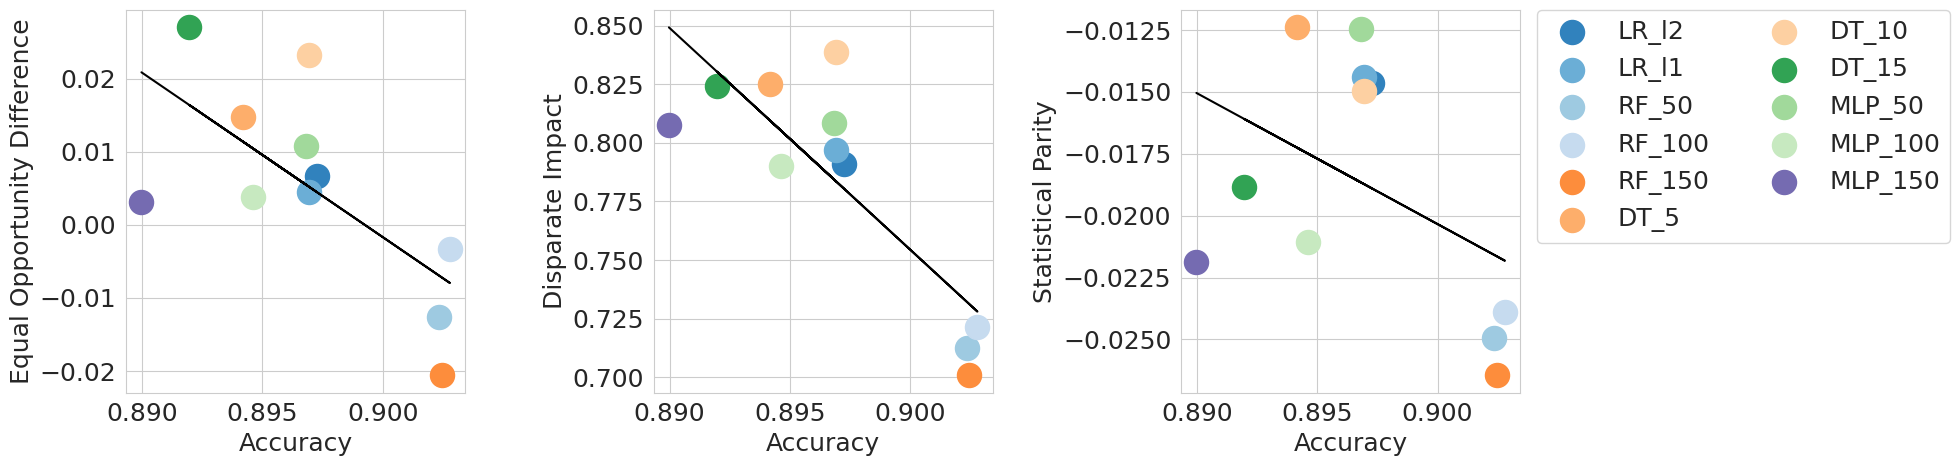

In [30]:
# font size
FONT_SIZE = 18

# set font size
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels

NUM_COLORS = 16
cm = plt.get_cmap('tab20c')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))  # Adjust nrows and ncols based on your needs

for i, col in enumerate(['Equal Opportunity Difference', 'Disparate Impact', 'Statistical Parity']):
    axs[i].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    for j, model in enumerate(tab_df['Model']):
        axs[i].scatter(tab_df['Accuracy'][j], tab_df[col][j], s=300, label=model)
    z = np.polyfit(tab_df['Accuracy'], tab_df[col], 1)
    p = np.poly1d(z)
    axs[i].plot(tab_df['Accuracy'], p(tab_df['Accuracy']), "black")

    axs[i].set_xlabel('Accuracy')
    axs[i].set_ylabel(col)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=2)
plt.tight_layout()
plt.show()